In [48]:
import numpy as np
from time import perf_counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=0.7)

In [97]:
from enum import Enum

class TargetState(Enum):
    SEQUENTIAL = [
        [1, 2, 3],
        [4, 5, 6],
        [7, 8, 9],
    ]
    IDENTITY = [
        [1, 0, 0],
        [0, 1, 0],
        [0, 0, 1],
    ]
    HORIZONTAL = [
        [1, 1, 1],
        [2, 2, 2],
        [3, 3, 3],
    ]

class Cube:
    
    def __init__(self, target_state): 
        self.target_state = np.array(target_state.value)
        self.cube = np.array(target_state.value)

    def is_solved(self):
        return np.array_equal(self.cube, self.target_state)

    def shuffle(self):
        self.cube = self.cube.flatten()
        np.random.shuffle(self.cube)
        self.cube = self.cube.reshape(self.target_state.shape)

    def swap(self, ax, ay, bx, by):
        self.cube[(ax, ay)], self.cube[(bx, by)] = self.cube[(bx, by)], self.cube[(ax, ay)]

    def show(self):
        plt.figure(figsize=(1.5, 1.5))
        sns.heatmap(self.cube, cbar=False, xticklabels=False, yticklabels=False,
                    linewidth=0.5, annot=True, cmap='coolwarm', square=True)
        plt.show()

    def __repr__(self):
        return str(self.cube)

In [71]:
class Solver:
    def __init__(self, cube):
        self.cube = cube
        self.counter = None
        self.timer = None

    def solve(self, verbose=False):
        self.counter = 0
        self.timer = 0
        tic = perf_counter()
        while self.cube.is_solved() == False:
            self.cube.swap(*np.random.randint(0, 3, 4))
            self.counter += 1
            if verbose:
                self.cube.show()
        toc = perf_counter()
        self.timer = toc - tic

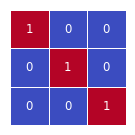

,counter,timer
count,1000.000000,1000.000000
mean,199.560000,0.009747
std,201.081277,0.009811
min,0.000000,0.000012
25%,58.000000,0.002840
50%,140.000000,0.006825
75%,271.250000,0.013361
max,1302.000000,0.065583


In [98]:
c = Cube(TargetState.IDENTITY)
c.show()
s = Solver(c)
results = []

for i in range(1000):
    s.cube.shuffle()
    s.solve()
    results.append((s.counter, s.timer))

df = pd.DataFrame(data=results, columns=['counter' ,'timer'])
df.describe()

<Axes: xlabel='counter', ylabel='Count'>

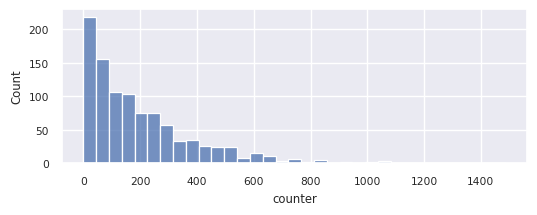

In [47]:
plt.figure(figsize=(6, 2))
sns.histplot(df.counter)